In [1]:
import pandas as pd
pd.set_option('display.max_rows', None)

train_df = pd.read_csv('./titanic/train.csv')

print(train_df.isna().sum())
print(train_df.info())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Non

In [2]:
train_df['Embarked'] = pd.Categorical(train_df['Embarked'], categories=['S', 'Q', 'C', 'Unknown'], ordered=False)
train_df['Embarked'] = train_df['Embarked'].fillna('Unknown')
train_df['Sex'] = pd.Categorical(train_df['Sex'], categories=['male', 'female'], ordered=False)
train_df['Pclass'] = pd.Categorical(train_df['Pclass'], categories=[3, 2, 1], ordered=True)


C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_17896\2875920509.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_sex = train_df.groupby('Sex')['Pclass'].value_counts().reset_index()
C:\Users\Pedro Cunha\AppData\Local\Temp\ipykernel_17896\2875920509.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_embarked = train_df.groupby('Embarked')['Pclass'].value_counts().reset_index()


Embarked
S          0.722783
C          0.188552
Q          0.086420
Unknown    0.002245
Name: proportion, dtype: float64


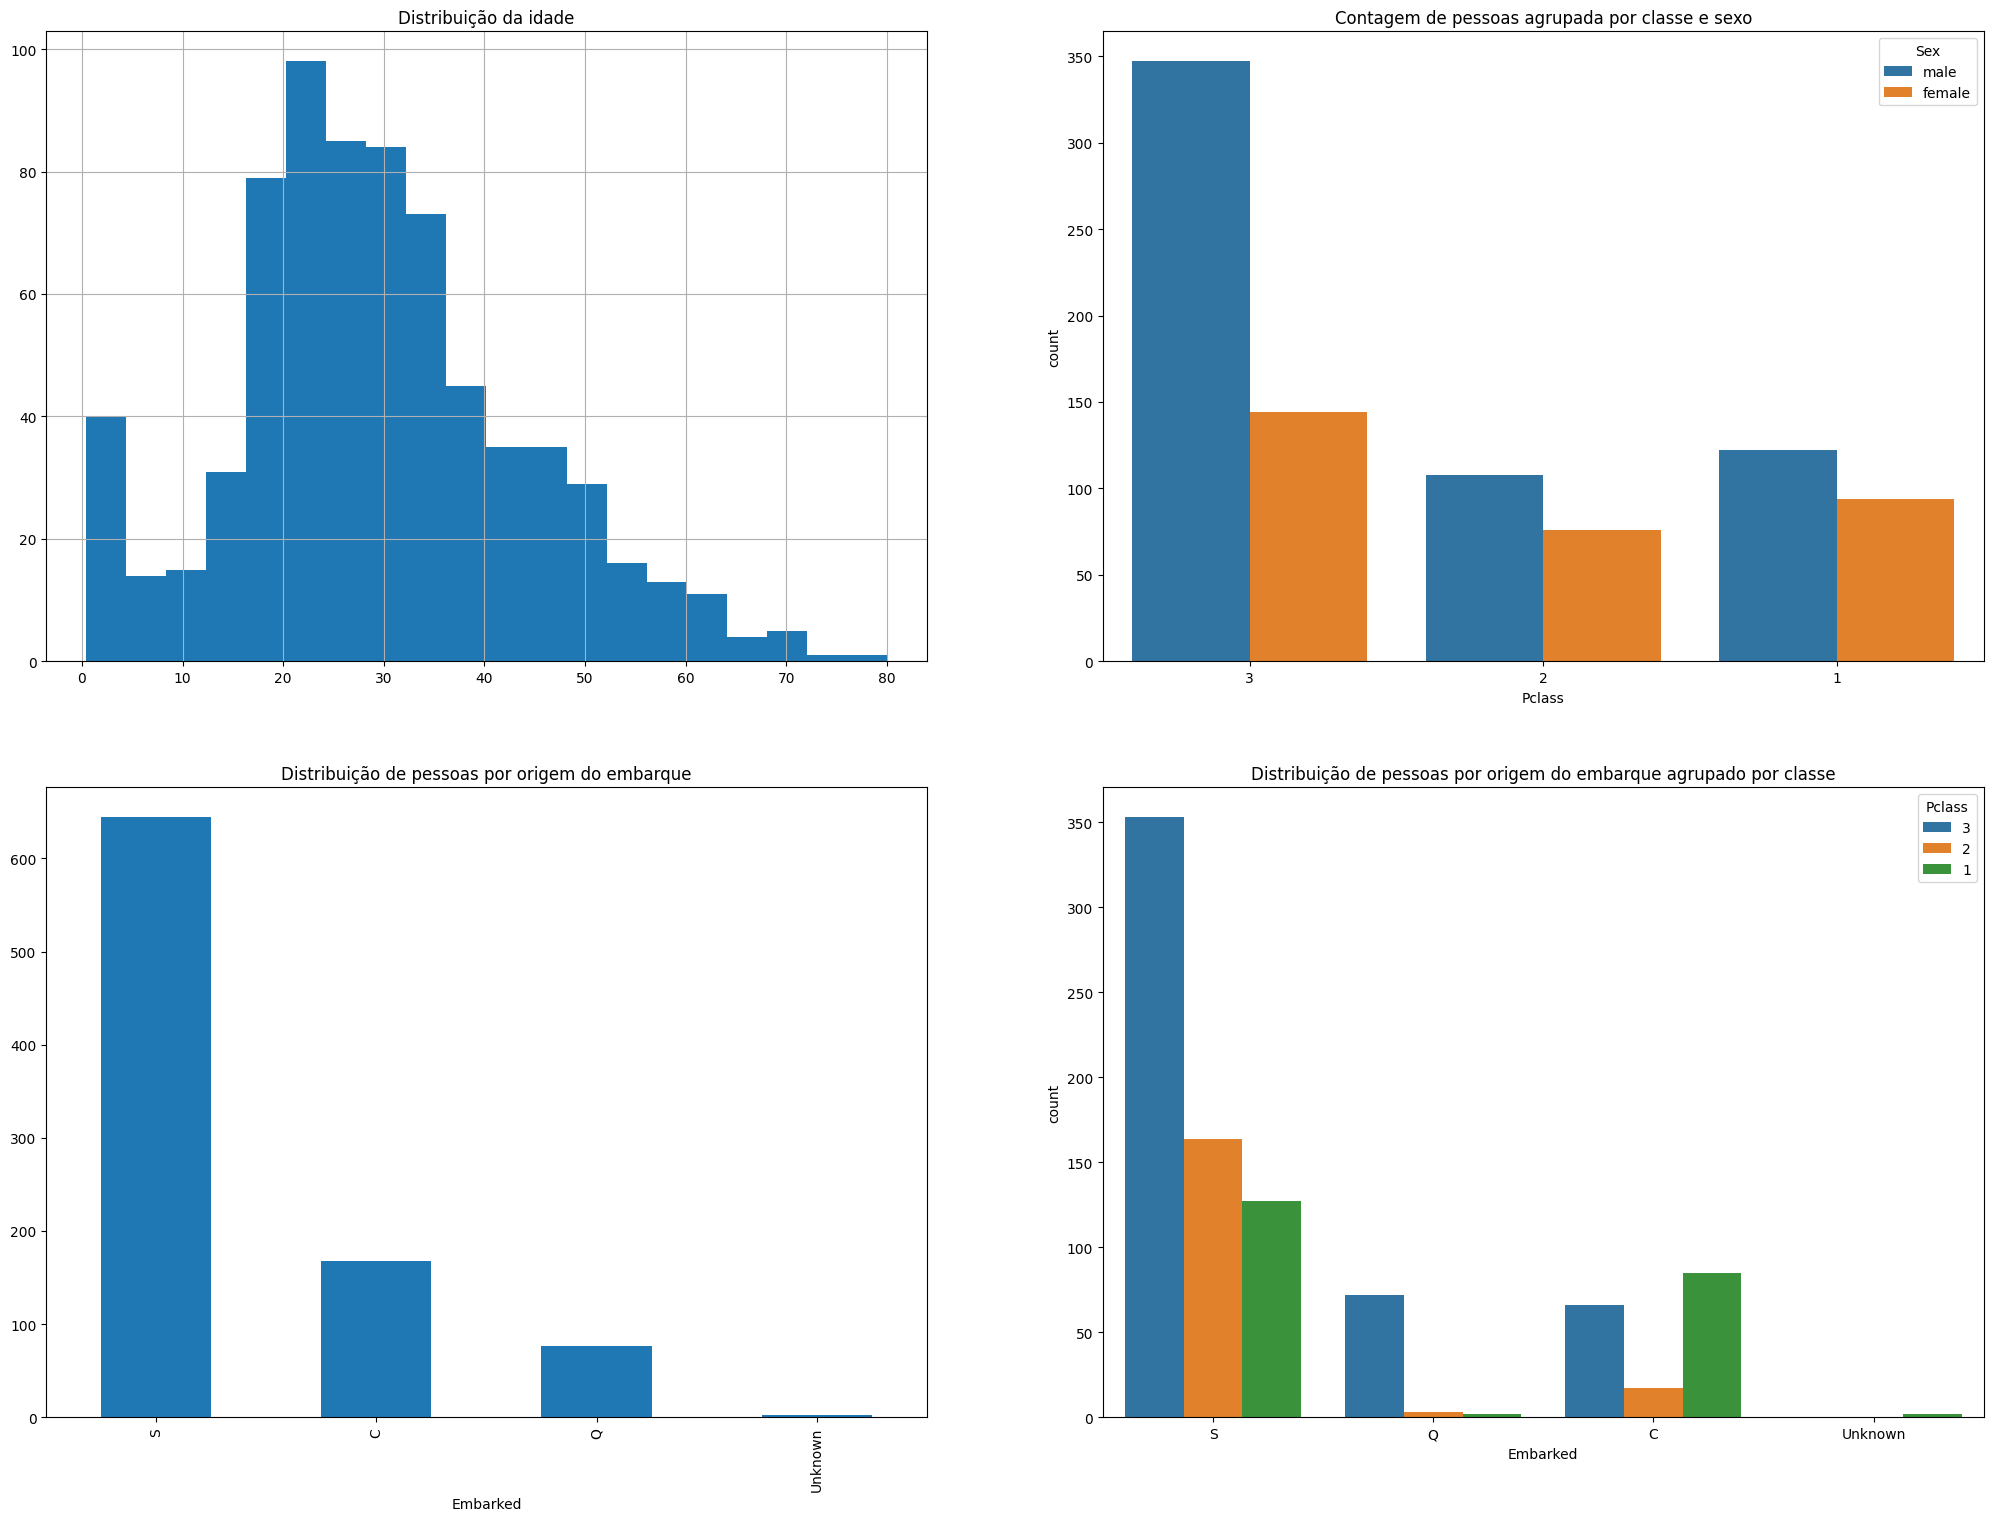

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

#Idade, Pclass, Sex, Fare, Embarked 

# Mais pessoas embarcadas entre 20 e 30 anos.
# Aproximadamente 2x mais pessoas embarcadas na terceira classe do que na primeira e segunda classe.
# A proporção entre homens e mulheres na terceira classe é aproximadamente de 2x homens, em comparação com as outras classes que é mais equilibrado.
# 70% das pessoas embarcaram em Southampton

fig, axes = plt.subplots(2, 2, figsize=(25, 18))

train_df['Age'].hist(bins=20, ax=axes[0][0])
axes[0][0].set_title('Distribuição da idade')

grouped_by_sex = train_df.groupby('Sex')['Pclass'].value_counts().reset_index()
sns.barplot(
    data=grouped_by_sex,
    x='Pclass', y='count',
    hue='Sex', ax=axes[0][1]
)
axes[0][1].set_title('Contagem de pessoas agrupada por classe e sexo')

train_df['Embarked'].value_counts().plot(kind='bar', ax=axes[1][0])
axes[1][0].set_title('Distribuição de pessoas por origem do embarque')
print(train_df['Embarked'].value_counts(normalize=True))

grouped_by_embarked = train_df.groupby('Embarked')['Pclass'].value_counts().reset_index()
embarked_class = sns.barplot(
    data=grouped_by_embarked,
    x='Embarked', y='count',
    hue='Pclass', ax=axes[1][1]
)
axes[1][1].set_title('Distribuição de pessoas por origem do embarque agrupado por classe')
plt.show()

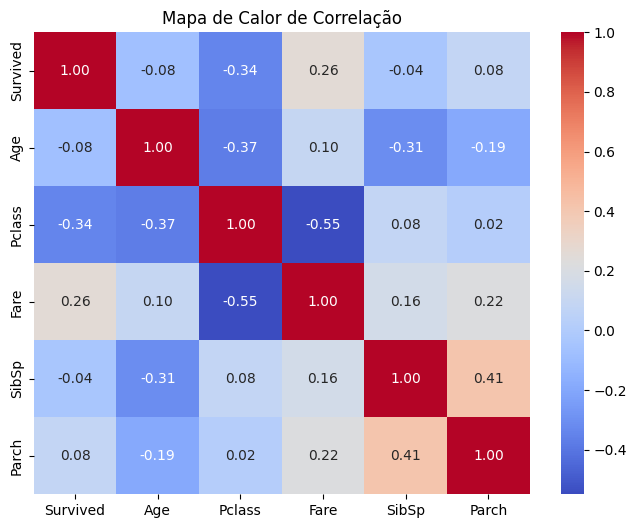

In [ ]:
# Sex, Cabin, Embarked e Ticket foram removidos da matriz de correlação por serem categóricas.

# Aqui podemos ver que a maior correlação é a Pclass e Fare, ambas trazem um sentido econômico para a relação com a sobrevivência.

train_df_dummy = pd.get_dummies(train_df, columns=['Sex', 'Cabin', 'Embarked',  'Ticket'], drop_first=True)

matrix_corr = train_df_dummy[['Survived', 'Age', 'Pclass', 'Fare', 'SibSp', 'Parch']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlação')
plt.show()


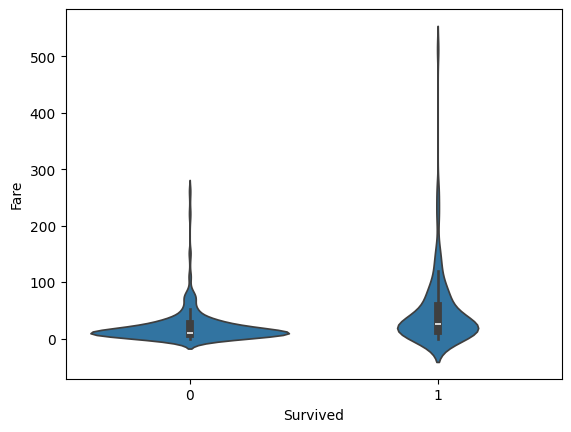

In [ ]:
# Na matriz de correlação a gente viu que Fare e Pclass foram as que tiveram maior correlação com survived. 
# Então vamos explorar essas duas variáveis.


# A partir do violinplot conseguimos ver que para os sobreviventes a Fare (tarifa) da passagem é muito mais esparsa, e também alcança valores mais altos
# Enquanto podemos ver que a concentração de pessoas que não sobreviveram é muito maior para os valores entre 0 e 100 de Fare
sns.violinplot(x='Survived', y='Fare', data=train_df)
plt.show()